In [52]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [63]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [64]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


3


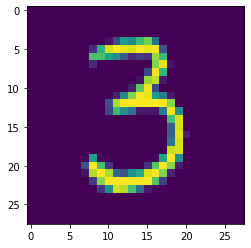

0


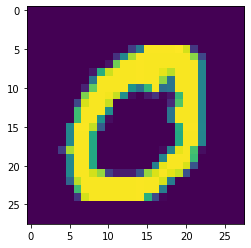

7


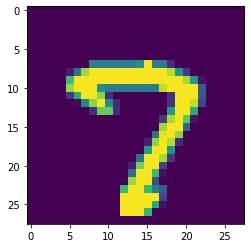

4


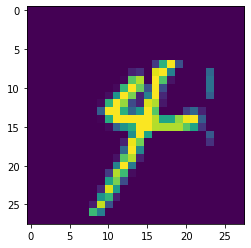

9


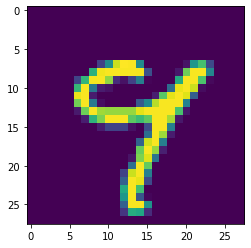

8


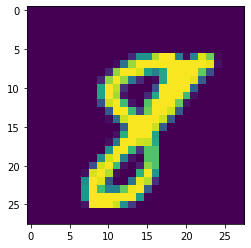

0


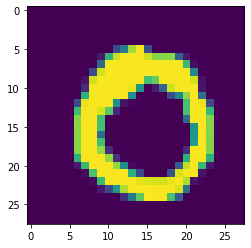

9


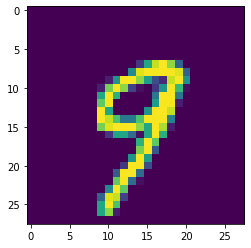

4


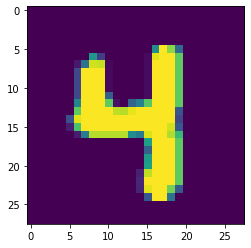

1


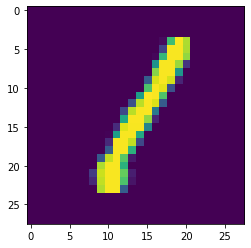

In [65]:
y_temp = to_categorical(y_train)
for i in range(50,60):
    img = x_train[i]
    y_=np.argmax(y_temp[i])
    print(y_)
    plt.imshow(img)
    plt.show()

In [66]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [67]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [68]:
x_train= x_train.reshape((len(x_train),-1))
x_test= x_test.reshape((len(x_test),-1))

In [70]:
print(x_train.shape)

(60000, 784)


In [78]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="sigmoid"))

model.add(Dense(16,activation="sigmoid"))

model.add(Dense(10,activation="softmax"))



In [79]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [80]:
model.fit(x_train,y_train,epochs=21,batch_size=10,validation_split=0.2)

Epoch 1/21
4800/4800 [==============================] - 10s 2ms/step - loss: 0.6695 - accuracy: 0.8390 - val_loss: 0.2532 - val_accuracy: 0.9389
Epoch 2/21
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2573 - accuracy: 0.9300 - val_loss: 0.1861 - val_accuracy: 0.9490
Epoch 3/21
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2006 - accuracy: 0.9450 - val_loss: 0.1539 - val_accuracy: 0.9590
Epoch 4/21
4800/4800 [==============================] - 9s 2ms/step - loss: 0.1754 - accuracy: 0.9517 - val_loss: 0.1442 - val_accuracy: 0.9610
Epoch 5/21
4800/4800 [==============================] - 9s 2ms/step - loss: 0.1567 - accuracy: 0.9558 - val_loss: 0.1303 - val_accuracy: 0.9647
Epoch 6/21
4800/4800 [==============================] - 9s 2ms/step - loss: 0.1434 - accuracy: 0.9595 - val_loss: 0.1273 - val_accuracy: 0.9647
Epoch 7/21
4800/4800 [==============================] - 9s 2ms/step - loss: 0.1313 - accuracy: 0.9625 - val_loss: 0.1159 - val_accuracy

In [82]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss * 100:.2f}%")

313/313 [==============================] - 0s 979us/step - loss: 0.1067 - accuracy: 0.9715
Accuracy: 97.15%
Loss: 10.67%


In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 [==============================] - 0s 864us/step


AttributeError: 'QuadMesh' object has no property 'xticklables'

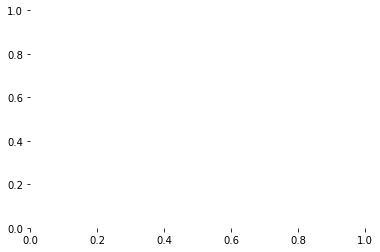

In [84]:
y_pred = model.predict(x_test)
y_pred_c = np.argmax(y_pred,axis=1)
y_pred_r = np.argmax(y_test,axis=1)

<AxesSubplot:>

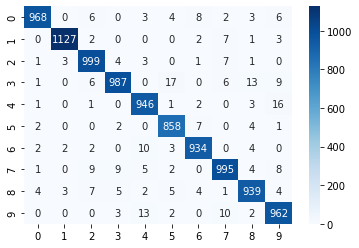

In [88]:
conf_mtx = confusion_matrix(y_pred_c,y_pred_r)

sns.heatmap(conf_mtx,xticklabels=[0,1,2,3,4,5,6,7,8,9],yticklabels=[0,1,2,3,4,5,6,7,8,9],cmap="Blues",annot=True,fmt="d")